# 1. What Is histplot?
In Seaborn, a hist plot (short for histogram plot) is a type of plot that shows the distribution of a numeric variable by dividing it into intervals (bins) and counting how many data points fall into each interval.



# 2. Why Do We Use It?
<table>
    <tr>
        <th>Reason</th>
        <th>Explanation</th>
    </tr>
    <tr>
        <td>Understand data distribution</td>
        <td>Shows how values of a variable are spread (e.g., normal, skewed, bimodal).</td>
    </tr>
     <tr>
        <td>Detect outliers</td>
        <td>Helps spot extreme values far from the rest</td>
    </tr> 
    <tr>
        <td>Group data into bins</td>
        <td>Summarizes large sets of numbers into understandable chunks</td>
    </tr> 
    <tr>
        <td> Check for skewness or symmetry</td>
        <td>It includes density — which a boxplot alone doesn't show.</td>
    </tr>
    <tr>
        <td>Helps decide on transformations or models later</td>
        <td>Use hue to compare multiple groups on the same axis</td>
    </tr>
</table>


In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load dataset and convert DataFrame
def load_dataset(df_name, file_path):
    file_path = file_path
    df_name = df_name
    
    df_name = pd.read_csv(file_path)
    if df_name is None:
        raise FileNotFoundError("File Path Not Found")
    
    df = pd.DataFrame(df_name)
    return df


df = load_dataset(file_path= r"D:\DataVisualizationForPython\datasets\supermarket_sales_utf8.csv",df_name = "sales")



In [5]:
# fix column names
def fix_column_names(dataframe):
    dataframe.columns = [col.lower().replace(" ", "_") for col in dataframe.columns]
    
# call the fix_column_names
fix_column_names(df)
df.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,692-92-5582,B,Mandalay,Member,Female,Food_and_beverages,54.84,3,8.226,172.746,2/20/2019,13:27:00,Credit card,164.52,4.761905,8.226,5.9
1,351-62-0822,B,Mandalay,Member,Female,Fashion_accessories,14.48,4,2.896,60.816,2019-06-02 00:00:00,18:07:00,Ewallet,57.92,4.761905,2.896,4.5
2,529-56-3974,B,Mandalay,Member,Male,Electronic_accessories,25.51,4,5.102,107.142,2019-09-03 00:00:00,17:03:00,Cash,102.04,4.761905,5.102,6.8
3,299-46-1805,B,Mandalay,Member,Female,Sports_and_travel,93.72,6,28.116,590.436,1/15/2019,16:19:00,Cash,562.32,4.761905,28.116,4.5
4,319-50-3348,B,Mandalay,Normal,Female,Home_and_lifestyle,40.30,2,4.030,84.630,2019-11-03 00:00:00,15:30:00,Ewallet,80.60,4.761905,4.030,4.4


In [ ]:
# find numeric columns
num_cols = [col for col in df.columns if df[col].dtype in ["float","int"]]
print(num_cols)

['unit_price', 'tax_5%', 'total', 'cogs', 'gross_margin_percentage', 'gross_income', 'rating']


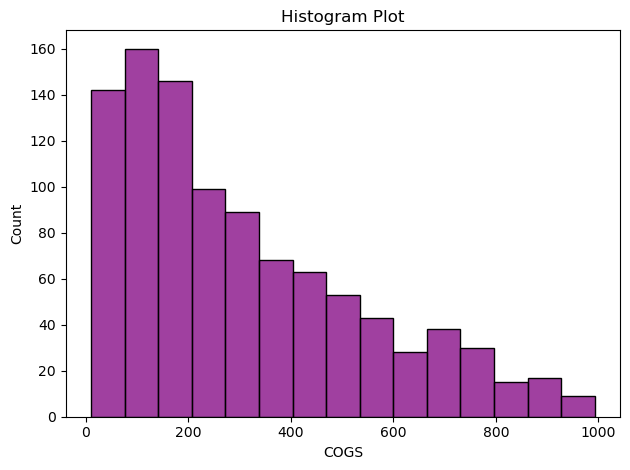

In [9]:
# create a histplot
sns.histplot(data = df, x = "cogs", color = "purple")
plt.title("Histogram Plot")
plt.xlabel("COGS")
plt.ylabel("Count")
plt.tight_layout()
plt.show() 

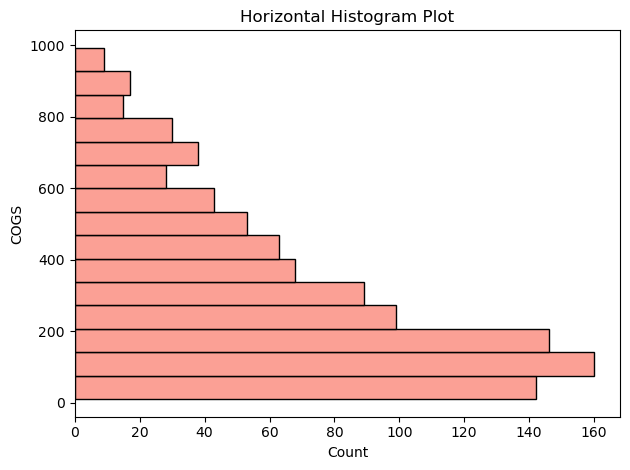

In [12]:
# Horizontal histogram 
sns.histplot(data = df, y = "cogs", color = "salmon")
plt.title("Horizontal Histogram Plot")
plt.ylabel("COGS")
plt.xlabel("Count")
plt.tight_layout()
plt.show() 

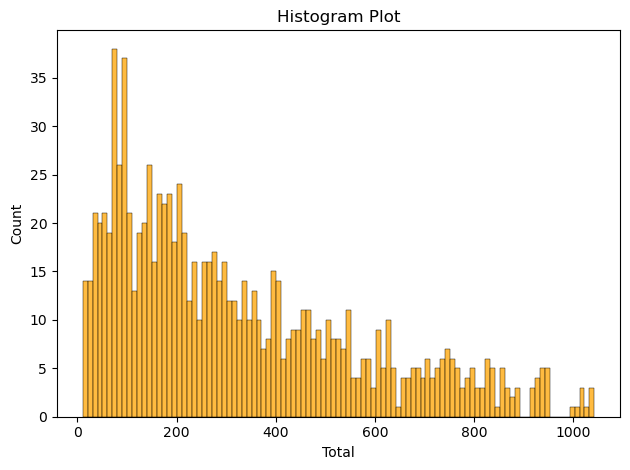

In [14]:
# binwidth attribute
sns.histplot(data = df, x = "total", color = "orange", binwidth = 10)
plt.title("Histogram Plot")
plt.xlabel("Total")
plt.ylabel("Count")
plt.tight_layout()
plt.show() 

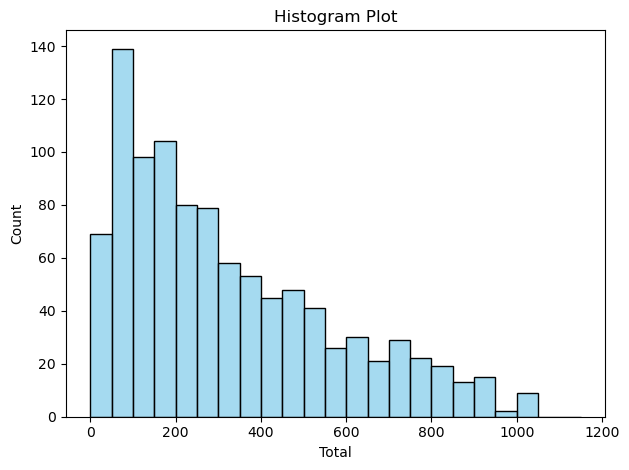

In [17]:
# bins attribute
sns.histplot(data = df, x = "total", color = "skyblue", bins = np.arange(0, 1200, 50))
plt.title("Histogram Plot")
plt.xlabel("Total")
plt.ylabel("Count")
plt.tight_layout()
plt.show() 

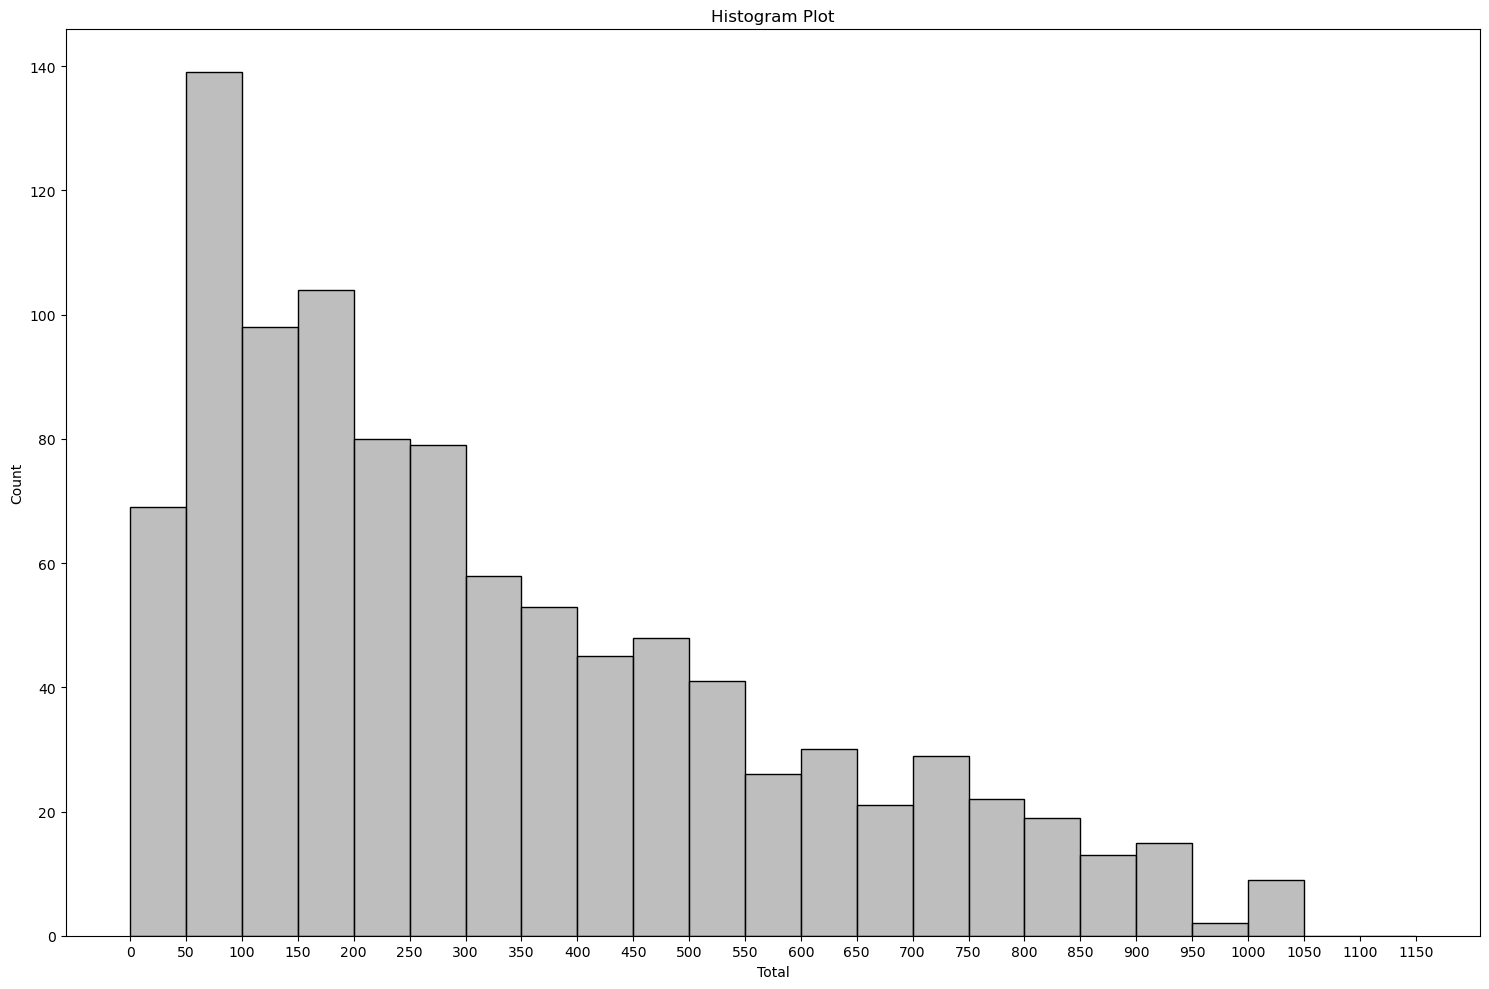

In [18]:
plt.figure(figsize = (15, 10))
sns.histplot(data = df, x = "total", color = "darkgray", bins = np.arange(0, 1200, 50))
plt.xticks(np.arange(0, 1200, 50))
plt.title("Histogram Plot")
plt.xlabel("Total")
plt.ylabel("Count")
plt.tight_layout()
plt.show() 

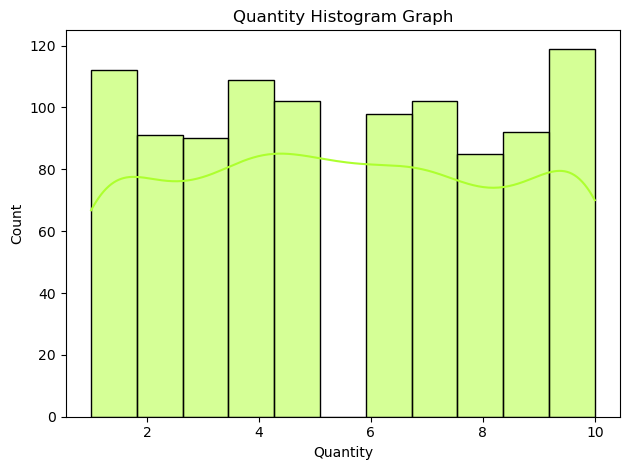

In [19]:
# Combine with KDE ()
sns.histplot(data = df, x = "quantity", kde = True, color = "greenyellow")
plt.title("Quantity Histogram Graph")
plt.xlabel("Quantity")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

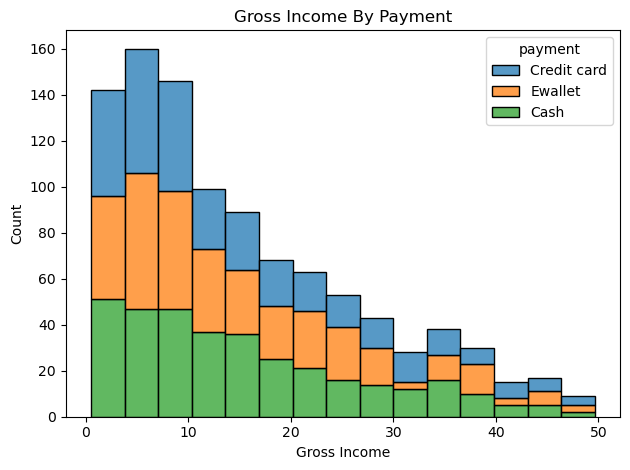

In [20]:
# multiple and hue attributes
sns.histplot(data = df, x = "gross_income", hue = "payment", multiple= "stack")
plt.title("Gross Income By Payment")
plt.xlabel("Gross Income")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

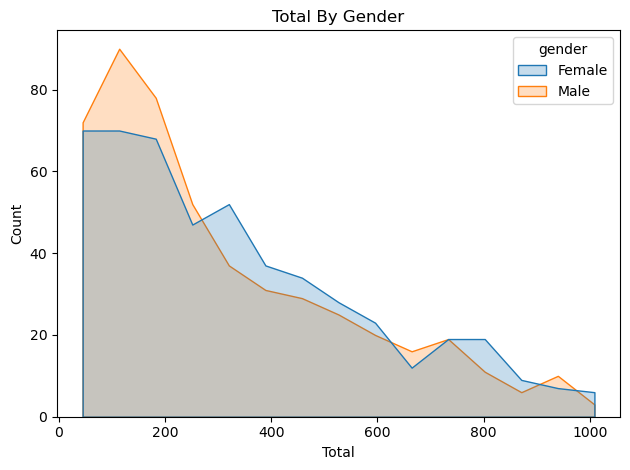

In [28]:
# fill and element attribute
sns.histplot(data = df, x = "total", hue = "gender" ,element= "poly",fill = True)
plt.title("Total By Gender")
plt.xlabel("Total")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

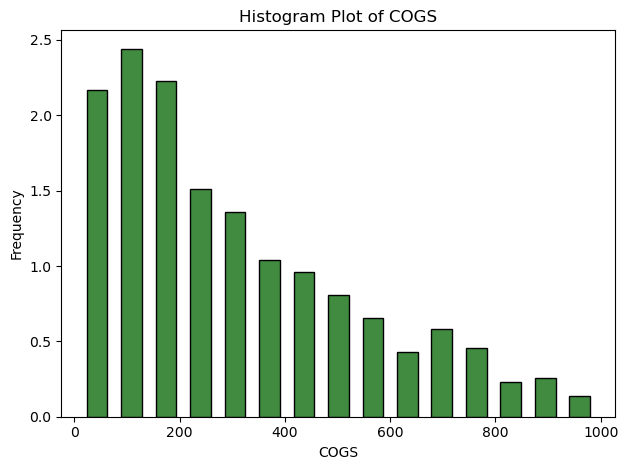

In [32]:
# shrink and stat attributes
# stat must be one of ['count', 'density','probability', 'frequency']
sns.histplot(data = df, x = "cogs", shrink = 0.6, color = "darkgreen", stat = "frequency")
plt.title("Histogram Plot of COGS")
plt.xlabel("COGS")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()